# 240970107
Vikith B Kotian

In [1]:
# Exercise 1

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv("./Materials/mtcars.csv") 

Number of rows in x:  (32, 1)
Number of rows in y:  (32, 1)


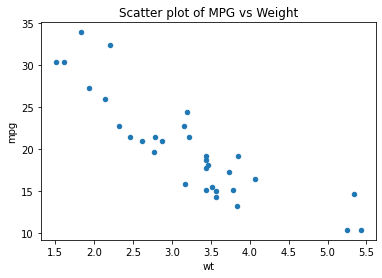

Linear Regression Coefficients:
Intercept (β₀):  37.28512616734217
Slope(β₁):  -5.344471572722721


In [3]:
#1. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line. 
x = df[['wt']].values
y = df[['mpg']].values
print("Number of rows in x: ",x.shape)
print("Number of rows in y: ",y.shape)

df.plot(kind="scatter", x="wt", y="mpg") 
plt.title("Scatter plot of MPG vs Weight")
plt.show()

def myFnLinReg(x, y):
    X_b = np.c_[np.ones((x.shape[0], 1)), x] 
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #theta = (x^T x)^(-1) x^T y
    return theta

theta = myFnLinReg(x, y)
print("Linear Regression Coefficients:")
print("Intercept (β₀): ", theta[0][0])
print("Slope(β₁): ", theta[1][0])

In [4]:
#2. Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.
from sklearn.model_selection import train_test_split

x = df[['wt']].values
y = df[['mpg']].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Training set size: ",x_train.shape[0])
print("Test set size: ",x_test.shape[0])

theta_train = myFnLinReg(x_train, y_train)

print("Trained Linear Regression Coefficients:")
print("Intercept (β₀): ", theta_train[0][0])
print("Slope(β₁): ", theta_train[1][0])

Training set size:  25
Test set size:  7
Trained Linear Regression Coefficients:
Intercept (β₀):  36.93731031351838
Slope(β₁):  -5.336941400557074


In [5]:
#3. What is the mpg of a car, whose weight is 5.5? 
mpg_pred = theta_train[0][0] + theta_train[1][0] * 5.5
print("Predicted mpg for weight",5.5,": ", mpg_pred)

Predicted mpg for weight 5.5 :  7.584132610454475


In [6]:
#4. Compute and print accuracy measures such as RMSE and R2  for the test set. 

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

x_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test]
y_pred = x_test_b.dot(theta_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_sq = r2_score(y_test, y_pred)

print("RMSE: ",rmse)
print("R^2: ",r_sq)

RMSE:  3.5321361326991414
R^2:  0.6879761857596269


             Method         w          b  Final Cost  Test RMSE  Test R^2
0          Batch GD  0.428490  17.375364   18.389396   7.607656 -0.120909
1               SGD -5.100438  36.375262    3.467425   3.913641  0.703359
2  Mini-Batch (m=8) -4.936551  35.567057    3.557861   3.975533  0.693903


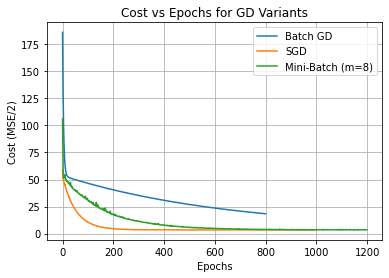

In [7]:
# 5. Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function

X = df[["wt"]].values.astype(float)
y = df["mpg"].values.astype(float)

# Train-test split
np.random.seed(42)
idx = np.arange(len(X))
np.random.shuffle(idx)
split = int(0.8 * len(X))
train_idx, test_idx = idx[:split], idx[split:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# Utility functions
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res/ss_tot

# Cost & Gradients
def compute_cost(w, b, Xb, yb):
    y_hat = w * Xb.reshape(-1) + b
    return np.mean((y_hat - yb) ** 2) / 2

def compute_grads(w, b, Xb, yb):
    m = len(Xb)
    y_hat = w * Xb.reshape(-1) + b
    dw = np.dot((y_hat - yb), Xb.reshape(-1)) / m
    db = np.sum(y_hat - yb) / m
    return dw, db

# Training function
def train_linear_gd(X, y, lr=0.01, epochs=1000, method="batch", batch_size=8, seed=0):
    rng = np.random.default_rng(seed)
    w, b = rng.normal(0, 0.1), 0.0
    cost_history = []

    n = len(X)
    for epoch in range(epochs):
        if method == "batch":
            batches = [np.arange(n)]
        elif method == "sgd":
            order = np.arange(n)
            rng.shuffle(order)
            batches = [[i] for i in order]
        elif method == "minibatch":
            order = np.arange(n)
            rng.shuffle(order)
            batches = [order[i:i+batch_size] for i in range(0, n, batch_size)]
        else:
            raise ValueError("method must be 'batch', 'sgd', or 'minibatch'")

        for batch_idx in batches:
            Xb, yb = X[batch_idx], y[batch_idx]
            dw, db = compute_grads(w, b, Xb, yb)
            w -= lr * dw
            b -= lr * db

        cost_history.append(compute_cost(w, b, X, y))

    return w, b, cost_history

# Train models
methods = {
    "Batch GD": {"lr": 0.01, "epochs": 800, "method": "batch"},
    "SGD": {"lr": 0.005, "epochs": 1000, "method": "sgd"},
    "Mini-Batch (m=8)": {"lr": 0.01, "epochs": 1200, "method": "minibatch", "batch_size": 8},
}

results = {}
for label, params in methods.items():
    w, b, cost_history = train_linear_gd(X_train, y_train, **params, seed=123)
    y_pred_test = w * X_test.reshape(-1) + b
    results[label] = {
        "w": w, "b": b, "cost_history": cost_history,
        "rmse": rmse(y_test, y_pred_test),
        "r2": r2_score(y_test, y_pred_test),
    }

# Results table
res_df = pd.DataFrame([
    {"Method": k, "w": v["w"], "b": v["b"],
     "Final Cost": v["cost_history"][-1],
     "Test RMSE": v["rmse"], "Test R^2": v["r2"]}
    for k,v in results.items()
])
print(res_df)

# Plot cost vs epochs
for label, out in results.items():
    plt.plot(out["cost_history"], label=label)

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE/2)")
plt.title("Cost vs Epochs for GD Variants")
plt.legend()
plt.grid(True)
plt.show()

# Exercise 2

In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("./Materials/Boston.csv") 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
#1. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’. 

if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

X = df.drop(columns=["medv"])
y = df["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

feature_importance = np.abs(lr.coef_)
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lr.coef_,
    "Abs_Importance": feature_importance
}).sort_values(by="Abs_Importance", ascending=False)

print("\nFeature importance ranking:\n", importance_df)

top5 = importance_df.head(5)
print("\nTop 5 features for predicting MEDV:\n", top5)


Feature importance ranking:
     Feature  Coefficient  Abs_Importance
4       nox   -16.238829       16.238829
5        rm     4.368755        4.368755
3      chas     2.773503        2.773503
7       dis    -1.400867        1.400867
10  ptratio    -0.923123        0.923123
12    lstat    -0.517640        0.517640
8       rad     0.257761        0.257761
0      crim    -0.128323        0.128323
2     indus     0.048859        0.048859
1        zn     0.029552        0.029552
11    black     0.013185        0.013185
9       tax    -0.009957        0.009957
6       age    -0.009248        0.009248

Top 5 features for predicting MEDV:
     Feature  Coefficient  Abs_Importance
4       nox   -16.238829       16.238829
5        rm     4.368755        4.368755
3      chas     2.773503        2.773503
7       dis    -1.400867        1.400867
10  ptratio    -0.923123        0.923123


In [10]:
#2. Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3 features.  (from sklearn.linear_model import LinearRegression)  
top3_features = importance_df.head(3)["Feature"].tolist()
print("Top 3 features selected:", top3_features)

X_top3 = df[top3_features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_top3, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Regression coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Top 3 features selected: ['nox', 'rm', 'chas']
Regression coefficients: [-19.96179065   8.12769364   5.63285732]
Intercept: -17.833011708646204


In [11]:
#3. Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R^2 Score: 0.4604
RMSE: 6.2905
